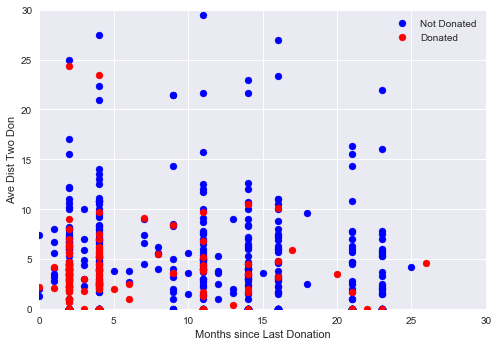

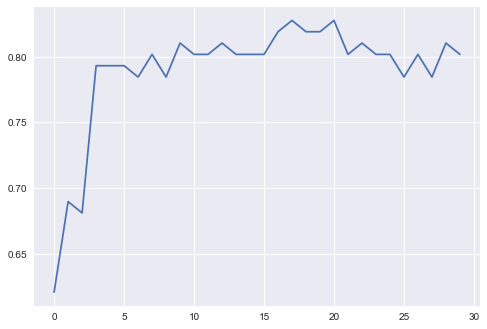

17


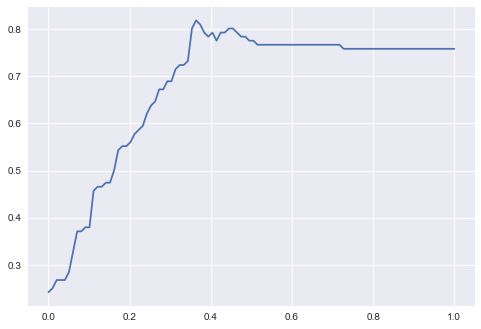

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

df = pd.read_csv('Train.csv' , index_col = 0)

df.drop('Total Volume Donated (c.c.)' ,axis=1 , inplace=True)

df['Ave Dist Two Don'] = (df['Months since First Donation'] - df['Months since Last Donation'])/df['Number of Donations']
df['Last More Than Ave'] = df['Months since Last Donation'] > df['Ave Dist Two Don']
df['Last More Than Ave'] = df['Last More Than Ave'].astype(int)
df['Prod'] = df['Last More Than Ave'] * df['Ave Dist Two Don']
df['Pord2'] = df['Months since Last Donation'] * df['Number of Donations']

df.drop('Months since First Donation' ,axis=1 , inplace=True)

X = df.loc[:,['Months since Last Donation','Number of Donations','Last More Than Ave','Prod','Ave Dist Two Don']]
y = df.loc[:,'Made Donation in March 2007']

#U = X.loc[:,'Number of Donations']/10
#X.loc[:,'Number of Donations'] = U

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11 , stratify = y)

#my_ind = (X_train.iloc[:,0] <30) & (X_train.iloc[:,1] <30) 
#X_train = X_train[my_ind]
#y_train= y_train[my_ind]

plt.scatter(X.loc[:,'Months since Last Donation'][y==0] , X.loc[:,'Ave Dist Two Don'][y==0] ,c='b'
            , label= 'Not Donated')
plt.scatter(X.loc[:,'Months since Last Donation'][y==1] , X.loc[:,'Ave Dist Two Don'][y==1] ,c='r', label= 'Donated')

plt.xlabel('Months since Last Donation')
plt.ylabel('Ave Dist Two Don')

plt.axis([0,30 , 0 , 30])


plt.legend()
plt.show()







from sklearn.neighbors import KNeighborsClassifier as KNC
SC = []
for k in range(30): 
    knn = KNC(n_neighbors= k+1)
    knn.fit(X_train , y_train)
    # y_pred = knn.predict(X_test)
    
    a = knn.score( X_test , y_test)
    SC.append(a)
    
plt.plot(SC)
plt.show()
print(np.argmax(SC))

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
SC1 = [] 
for k in np.linspace(0,1,100):
    y_pred= np.empty(len(y_pred_proba))
    for i in range(len(y_pred_proba)):
        if y_pred_proba[i] > k:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
       
    SC1.append(1 - abs(y_pred - y_test).sum()/len(y_test))

plt.plot(np.linspace(0,1,100) , SC1)
plt.show()

SC = logreg.score(X_test , y_test)

In [325]:
df.head()

,Months since Last Donation,Number of Donations,Made Donation in March 2007,Ave Dist Two Don,Last More Than Ave,Prod,Pord2
619,2,50,1,1.920000,1,1.92,100
664,0,13,1,2.153846,0,0.00,0
441,1,16,1,2.125000,0,0.00,16
160,2,20,1,2.150000,0,0.00,40
358,1,24,0,3.166667,0,0.00,24
